Импортируем класс YOLO из модуля ultralytics.

In [1]:
from ultralytics import YOLO

Создаем объект модели YOLO, используя веса из файла "yolov8n_saved5.pt". Этот файл содержит веса модели обученной в файле ModelMachineLearn.ipynb

In [2]:
model = YOLO("yolov8n_saved5.pt")

Обнаружение объектов на изображении green-apple-with-leaves_1101-453.jpg (зеленое яблоко) с помощью модели

In [4]:
# Perform object detection on an image
results = model("C:/Users/Samurai-kun/Diploma/img/green-apple-with-leaves_1101-453.jpg")


image 1/1 C:\Users\Samurai-kun\Diploma\img\green-apple-with-leaves_1101-453.jpg: 448x640 1 Apple, 73.8ms
Speed: 2.0ms preprocess, 73.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


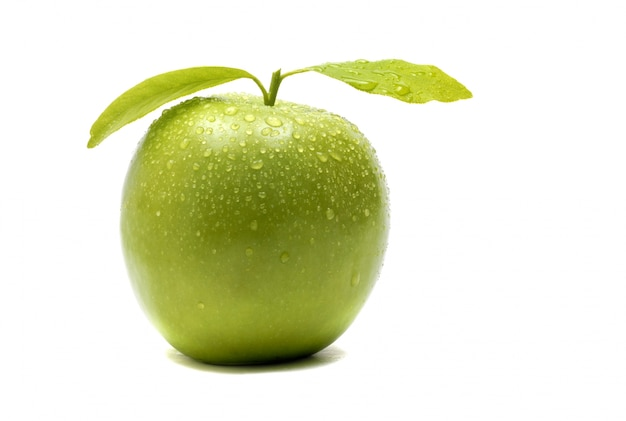

In [5]:
from IPython.display import Image
Image("C:/Users/Samurai-kun/Diploma/img/green-apple-with-leaves_1101-453.jpg", width=320, height=240)

Выводим результаты обнаружения

In [6]:
for result in results:
    result.show()

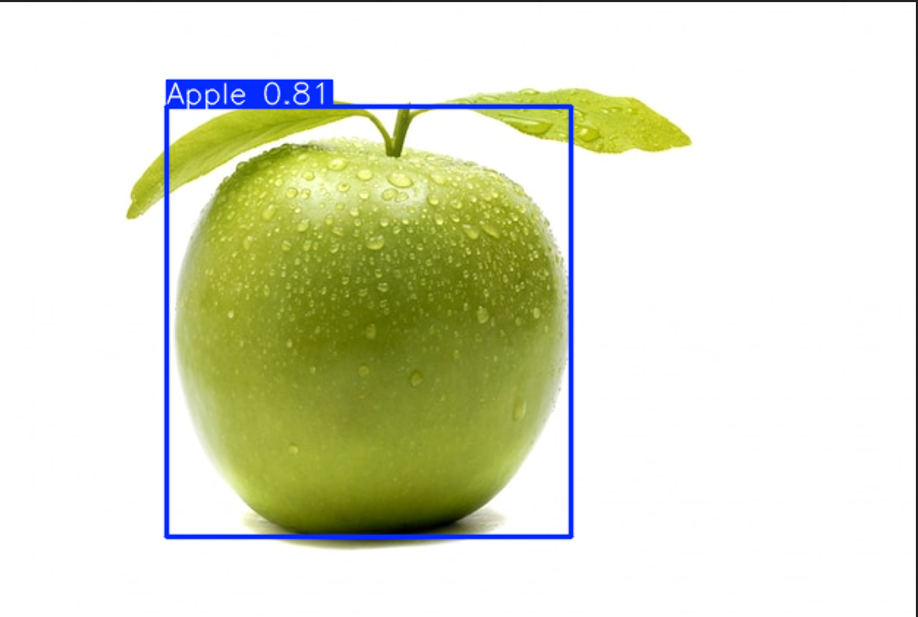

In [7]:
Image("C:/Users/Samurai-kun/Diploma/img/appleafter.png", width=320, height=240)

Как видим, обученная мною модель справилась на порядой лучше, чем предобученная "yolov8n.pt".

In [8]:
metrics = model.val(data="C:/Users/Samurai-kun/Downloads/fruitsDetect/Fruits-detection/data.yaml", batch=16, conf=0.25, iou=0.6)

Ultralytics YOLOv8.2.76  Python-3.9.13 torch-2.3.0 CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)


val: Scanning D:\Users\Samurai-kun\Documents\yolov5\datasets\Fruits-detection\valid\labels.cache... 914 images, 0 backg

val: WARNING  D:\Users\Samurai-kun\Documents\yolov5\datasets\Fruits-detection\valid\images\3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [01:23


                   all        914       3227      0.315      0.193      0.225      0.142
                 Apple        188        557      0.218      0.276      0.215      0.152
                Banana        167        390      0.421     0.0821       0.24      0.157
                 Grape        199        809      0.396      0.152      0.256      0.133
                Orange        197       1100       0.28      0.361      0.244      0.147
             Pineapple         77        154      0.315      0.111      0.202      0.114
            Watermelon        107        217      0.257      0.175      0.196      0.147
Speed: 1.4ms preprocess, 82.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\val7


In [9]:
metrics.box.maps

array([    0.15218,     0.15677,     0.13348,     0.14661,     0.11383,     0.14734])

In [10]:
metrics.box.map  # map50-95

0.14170210674278183

In [11]:
metrics.box.map50  # map50

0.22548530249323698

In [12]:
metrics.box.map75  # map75

0.15287633110774027

Хоть показатели и не высоки, но в целом модель имеет право на жизнь. При большем количестве эпох обучения, результат должен существенно улучшиться.